In [436]:
#데이터 라이브러리
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [437]:
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
# 머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [438]:
# 데이터 불러오기

train = pd.read_csv("../input/spaceship-titanic/train.csv")
test = pd.read_csv("../input/spaceship-titanic/test.csv")
sub = pd.read_csv("../input/spaceship-titanic/sample_submission.csv")

train.shape, test.shape, sub.shape

((8693, 14), (4277, 13), (4277, 2))

In [439]:
# 데이터 탐색

In [440]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [441]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [442]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  4277 non-null   object
 1   Transported  4277 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 37.7+ KB


In [443]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [444]:
train.columns, test.columns

(Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'Name', 'Transported'],
       dtype='object'),
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'Name'],
       dtype='object'))

In [445]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [446]:
train['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

In [447]:
train['Transported'].unique()

array([False,  True])

In [448]:
# 결측값 확인
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [449]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<AxesSubplot:xlabel='Transported', ylabel='count'>

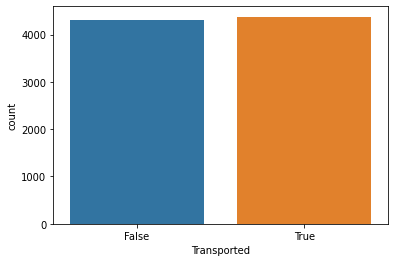

In [450]:
sns.countplot(x='Transported', data= train)

In [451]:
train["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [452]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [453]:
for one in train.columns:
    print('컬럼명 : ', one)
    print('유일한 값의 실제값 : ', len(train[one].unique()), train[one].unique())

컬럼명 :  PassengerId
유일한 값의 실제값 :  8693 ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
컬럼명 :  HomePlanet
유일한 값의 실제값 :  4 ['Europa' 'Earth' 'Mars' nan]
컬럼명 :  CryoSleep
유일한 값의 실제값 :  3 [False True nan]
컬럼명 :  Cabin
유일한 값의 실제값 :  6561 ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
컬럼명 :  Destination
유일한 값의 실제값 :  4 ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
컬럼명 :  Age
유일한 값의 실제값 :  81 [39. 24. 58. 33. 16. 44. 26. 28. 35. 14. 34. 45. 32. 48. 31. 27.  0.  1.
 49. 29. 10.  7. 21. 62. 15. 43. 47.  2. 20. 23. 30. 17. 55.  4. 19. 56.
 nan 25. 38. 36. 22. 18. 42. 37. 13.  8. 40.  3. 54.  9.  6. 64. 67. 61.
 50. 41. 57. 11. 52. 51. 46. 60. 63. 59.  5. 79. 68. 74. 12. 53. 65. 71.
 75. 70. 76. 78. 73. 66. 69. 72. 77.]
컬럼명 :  VIP
유일한 값의 실제값 :  3 [False True nan]
컬럼명 :  RoomService
유일한 값의 실제값 :  1274 [   0.  109.   43. ... 1569. 8586.  745.]
컬럼명 :  FoodCourt
유일한 값의 실제값 :  1508 [   0.    9. 3576. ... 3208. 6819. 4688.]
컬럼명 :  ShoppingMall
유일한 값의 실제값 :  1116 [   

In [454]:
for one in train.columns:
    print(one)
    print('nan의 갯수 : ', train[one].isnull().sum())

PassengerId
nan의 갯수 :  0
HomePlanet
nan의 갯수 :  201
CryoSleep
nan의 갯수 :  217
Cabin
nan의 갯수 :  199
Destination
nan의 갯수 :  182
Age
nan의 갯수 :  179
VIP
nan의 갯수 :  203
RoomService
nan의 갯수 :  181
FoodCourt
nan의 갯수 :  183
ShoppingMall
nan의 갯수 :  208
Spa
nan의 갯수 :  183
VRDeck
nan의 갯수 :  188
Name
nan의 갯수 :  200
Transported
nan의 갯수 :  0


In [455]:
train['HomePlanet'].isnull().sum()

201

In [456]:
train.loc[train['Age'].isnull(), 'Age'] = train['Age'].median()
train['Age'].isnull().sum()

0

In [457]:
test.loc[test['Age'].isnull(), 'Age'] = test['Age'].median()
test['Age'].isnull().sum()

0

In [458]:
train.loc[train['RoomService'].isnull(),'RoomService'] = train['RoomService'].median()
train['RoomService'].isnull().sum()

0

In [459]:
test.loc[test['RoomService'].isnull(),'RoomService'] = test['RoomService'].median()
test['RoomService'].isnull().sum()

0

In [460]:
train.loc[train['FoodCourt'].isnull(),'FoodCourt'] = train['FoodCourt'].median()
train['FoodCourt'].isnull().sum()

0

In [461]:
test.loc[test['FoodCourt'].isnull(),'FoodCourt'] = test['FoodCourt'].median()
test['FoodCourt'].isnull().sum()

0

In [462]:
train.loc[train['Spa'].isnull()] = train['Spa'].median()
test.loc[test['Spa'].isnull(),'Spa'] = test['Spa'].median()

In [470]:
# Age
sel = [ 'Age', 'ShoppingMall' ]

X = train[sel]
y = train['Transported']

last_test = test[sel]

<AxesSubplot:>

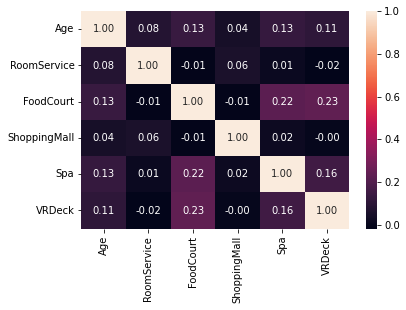

In [471]:
sns.heatmap(train.corr(), annot = True,fmt=".2f" )

In [473]:
#머신러닝 학습
model1 = KNeighborsClassifier()
model1.fit(X, y)
print("학습용 정확도 : ", model1.score(X,y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
pred = model1.predict(last_test)
pred

In [ ]:
sub['Transported'] = pred
sub.to_csv("first_sub_2209.csv", index=False)